In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

In [3]:
def get_labels(pts, centroids):
    dist = np.hstack([np.linalg.norm(pts - centroid, axis=1).reshape(-1, 1) for centroid in centroids])
    return np.argmin(dist, axis=1)
    
def kmeans(a, k, s = 20, eps = 1e-05): 
    i = 0
    N = a.shape[0] 
    dim = a.shape[1]
    centr = a[:k]
    centr_tmp = np.zeros((k, dim))
    a = np.expand_dims(a, axis = 1) 
    d = dim * N * np.max(a)**2 
    d1 = 0
    
    while d1 - d > eps or i < s:
        d1 = d
        centr_tmp = centr
        
        numcentr = np.argmin(((a - centr) ** 2).sum(axis = 2), axis = 1) 
        C = np.zeros(N * k * dim).reshape(N, k, dim)
        C[np.arange(N), numcentr, :] = (a - centr)[np.arange(N),  numcentr, :] / np.bincount(numcentr)[numcentr].reshape(N, 1)
        centr = centr_tmp + np.squeeze(C.sum(axis = 0))        

        numcentr = np.argmin(((a - centr) ** 2).sum(axis = 2), axis = 1)
        C = np.zeros(N * k * dim).reshape(N, k, dim)
        C[np.arange(N), numcentr, :] = (a - centr)[np.arange(N),  numcentr, :]
        d = np.sqrt((C ** 2).sum(axis = 2)).sum(axis = 1).mean()         
        i = i + 1
        
    return centr, d

In [4]:
digits = load_digits()

#1

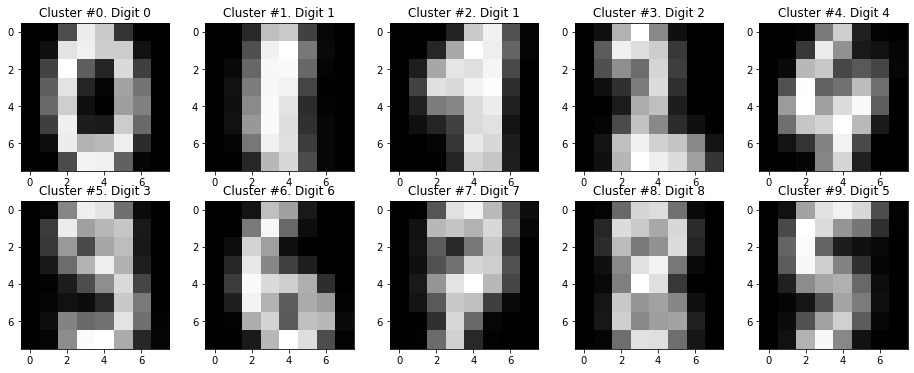

In [5]:
x = kmeans(digits.data, 10)[0]
labels = get_labels(digits.data, x)
plt.figure(figsize=(16, 6))
for i in range(10):
    mask = labels == i
    plt.subplot(2, 5, i + 1)
    plt.imshow(x[i,:].reshape([8,8]), cmap ='gray')
    plt.title('Cluster #{}. Digit {}'.format(i,(np.argmax(np.bincount(digits.target[mask])))))

#2

In [6]:
def error(digits, labels, i):
    return ((labels==i).sum()-np.max(np.bincount(digits.target[labels==i])))/(labels==i).sum()
for i in range(10):
    print("Error in cluster ", i, "=", error(digits, labels, i))

Error in cluster  0 = 0.0111731843575419
Error in cluster  1 = 0.16666666666666666
Error in cluster  2 = 0.39325842696629215
Error in cluster  3 = 0.16853932584269662
Error in cluster  4 = 0.012269938650306749
Error in cluster  5 = 0.5648648648648649
Error in cluster  6 = 0.027624309392265192
Error in cluster  7 = 0.1457286432160804
Error in cluster  8 = 0.17682926829268292
Error in cluster  9 = 0.09090909090909091


#3

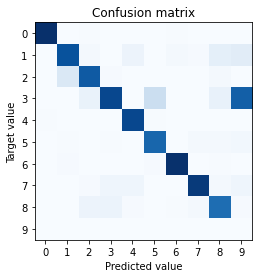

In [7]:
clusters=[]
pred=[]
for i in range(10):
    clusters.append(np.argmax(np.bincount(digits.target[labels==i])))
for i in range(digits.target.shape[0]):
    pred.append(clusters[labels[i]])
pred=np.array(pred)
matrix=np.array([[((digits.target==i) * (pred==j)).sum() for i in range(10)] for j in range(10)])
plt.imshow(matrix, cmap='Blues')
plt.xticks(range(10))
plt.yticks(range(10))
plt.title("Confusion matrix")
plt.ylabel("Target value")
plt.xlabel("Predicted value")
plt.show()

Возникают проблемы с определением девятки

#4

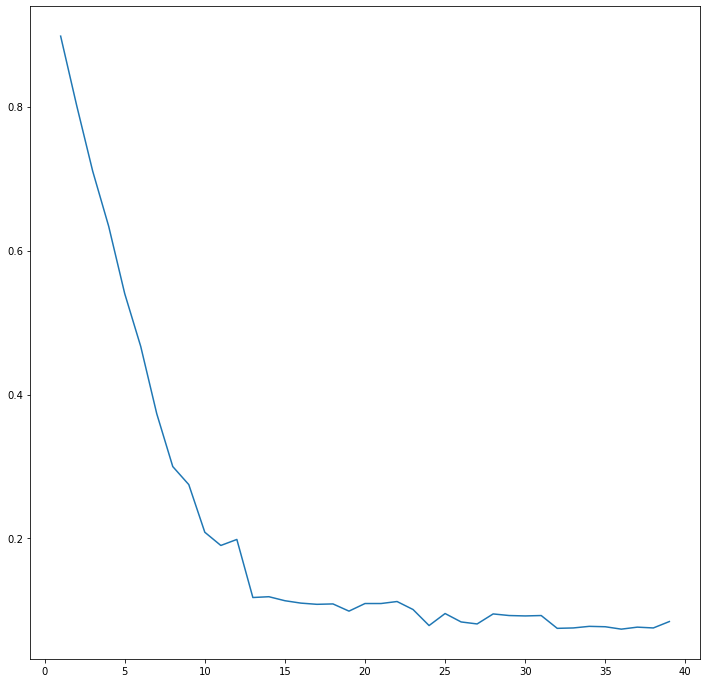

In [8]:
def pred_on_k(k):
    clusters=[]
    pred=[]
    x=kmeans(digits.data,k)[0]
    labels = get_labels(digits.data, x)
    for i in range(k):
        clusters.append(np.argmax(np.bincount(digits.target[labels==i])))
    for i in range(digits.target.shape[0]):
        pred.append(clusters[labels[i]])
    return pred
errors=[(digits.target!=pred_on_k(i)).sum()/len(digits.target) for i in range(1,40)]
plt.figure(figsize=(12,12))
plt.plot(range(1,40), errors)
plt.show()

На 23 кластерах достигается локальный минимум, более того, при дальнейшем увеличении количества кластеров, точность сильно не меняется

#5

(1797, 64)


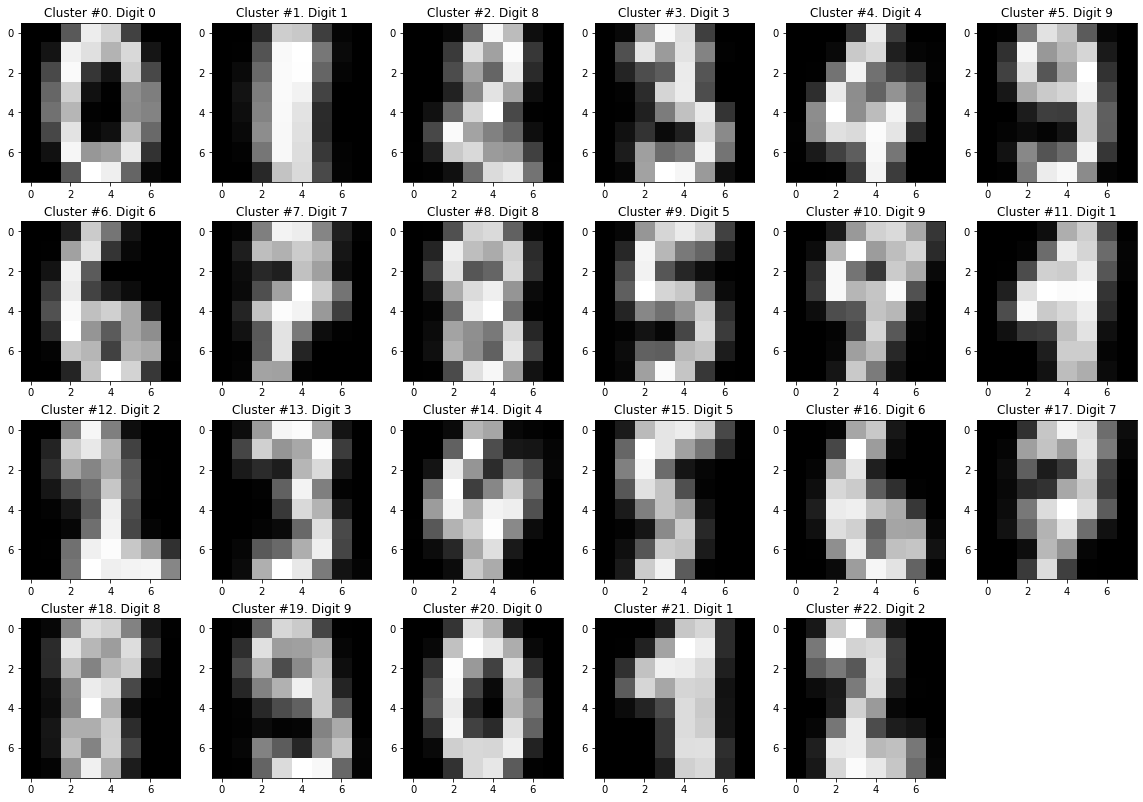

In [9]:
x = kmeans(digits.data, 23)[0]
labels = get_labels(digits.data, x)
print(digits.data.shape)
plt.figure(figsize=(20,14))
for i in range(23):
    mask = labels == i
    plt.subplot(4, 6, i + 1)
    plt.imshow(x[i,:].reshape([8,8]), cmap ='gray')
    plt.title('Cluster #{}. Digit {}'.format(i,(np.argmax(np.bincount(digits.target[mask])))))

In [ ]:
У всех цифр получилось по несколько кластеров, у единицы и восьмёрки их аж три

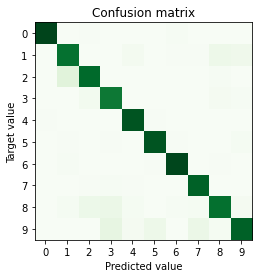

In [10]:
clusters=[]
pred=[]
for i in range(23):
    clusters.append(np.argmax(np.bincount(digits.target[labels==i])))
for i in range(digits.target.shape[0]):
    pred.append(clusters[labels[i]])
pred=np.array(pred)
matrix=np.array([[((digits.target==i) * (pred==j)).sum() for i in range(10)] for j in range(10)])
#print(matrix)
plt.imshow(matrix, cmap='Greens')
plt.xticks(range(10))
plt.yticks(range(10))
plt.title("Confusion matrix")
plt.ylabel("Target value")
plt.xlabel("Predicted value")
plt.show()

увелечение количества кластеров привело к улучшению матрицы ошибок